# 🏠 **2. Modelado Imágenes** 🏠

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import random

# Fijar semillas para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications, models, optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Ruta base de los archivos en Google Drive
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"

# Cargar imágenes normalizadas
imgs_train = np.load(base_path + "imgs_train_normalized.npy")
imgs_val = np.load(base_path + "imgs_val_normalized.npy")
imgs_test = np.load(base_path + "imgs_test_normalized.npy")

# Cargar etiquetas en log
y_train = np.load(base_path + "y_train_tab.npy")
y_val = np.load(base_path + "y_val_tab.npy")
y_test = np.load(base_path + "y_test_tab.npy")

# Verificar formas de los datos
print(f"Shape de imgs_train: {imgs_train.shape}")
print(f"Shape de imgs_val: {imgs_val.shape}")
print(f"Shape de imgs_test: {imgs_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_val: {y_val.shape}")
print(f"Shape de y_test: {y_test.shape}")


Shape de imgs_train: (2110, 224, 224, 3)
Shape de imgs_val: (373, 224, 224, 3)
Shape de imgs_test: (622, 224, 224, 3)
Shape de y_train: (2110,)
Shape de y_val: (373,)
Shape de y_test: (622,)


# **Escoger modelo pre-entrenado:**

La elección del modelo debe centrarse en cómo las imágenes aportan valor predictivo adicional al modelo tabular.

**Imágenes de interiores:**
Representan detalles como acabados, tamaño percibido, iluminación, y calidad del espacio.

**Datos tabulares:**
Ofrecen información objetiva como tamaño, ubicación, y características técnicas.

***Modelos utilizados en Modelos similares***

En la literatura y proyectos reales de predicción de precios inmobiliarios, EfficientNet y ResNet son las opciones más comunes. Aquí están las razones basadas en estudios y casos previos:


**A. EfficientNet (B0 a B3):**

Utilizado en proyectos como Zillow y aplicaciones similares, donde la calidad visual de los inmuebles es crucial.

Ventajas específicas:
Captura patrones visuales clave (acabados de lujo, espacios modernos).
Excelente relación entre precisión y uso de recursos.

Pre-entrenamiento:
Trained on ImageNet, lo cual es generalista pero capta texturas y patrones relevantes para interiores.


**B. ResNet (ResNet50):**
Generalista probado:
Muy utilizado en tareas generales, incluyendo propiedades inmobiliarias en estudios académicos.

Ventajas específicas:
Extrae características visuales robustas de imágenes complejas.

Pre-entrenamiento:
También basado en ImageNet, adaptado a tareas generales.


# **Configuración EfficientNetB0 Pre-entrenado:**


In [ ]:
#preparacion imagenes para EfficientNet
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

# Cargar imágenes originales
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"
imgs_train = np.load(base_path + "imgs_train_normalized.npy")
imgs_val = np.load(base_path + "imgs_val_normalized.npy")
imgs_test = np.load(base_path + "imgs_test_normalized.npy")

# Aplicar preprocess_input de EfficientNetB0
imgs_train_efficient = preprocess_input(imgs_train)
imgs_val_efficient = preprocess_input(imgs_val)
imgs_test_efficient = preprocess_input(imgs_test)

# Guardar las imágenes normalizadas
np.save(base_path + "imgs_train_efficient.npy", imgs_train_efficient)
np.save(base_path + "imgs_val_efficient.npy", imgs_val_efficient)
np.save(base_path + "imgs_test_efficient.npy", imgs_test_efficient)

print("✅ Imágenes normalizadas para EfficientNetB0 guardadas correctamente.")


✅ Imágenes normalizadas para EfficientNetB0 guardadas correctamente.


In [ ]:
# Ruta base de los archivos en Google Drive
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"

# Cargar imágenes normalizadas
imgs_train_efficient = np.load(base_path + "imgs_train_efficient.npy")
imgs_val_efficient = np.load(base_path + "imgs_val_efficient.npy")
imgs_test_efficient = np.load(base_path + "imgs_test_efficient.npy")

# Cargar etiquetas en log
y_train = np.load(base_path + "y_train_tab.npy")
y_val = np.load(base_path + "y_val_tab.npy")
y_test = np.load(base_path + "y_test_tab.npy")

# Verificar formas de los datos
print(f"Shape de imgs_train: {imgs_train_efficient.shape}")
print(f"Shape de imgs_val: {imgs_val_efficient.shape}")
print(f"Shape de imgs_test: {imgs_test_efficient.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_val: {y_val.shape}")
print(f"Shape de y_test: {y_test.shape}")

Shape de imgs_train: (2110, 224, 224, 3)
Shape de imgs_val: (373, 224, 224, 3)
Shape de imgs_test: (622, 224, 224, 3)
Shape de y_train: (2110,)
Shape de y_val: (373,)
Shape de y_test: (622,)


In [ ]:
# Definir el modelo base con EfficientNetB0 (sin incluir la parte de clasificación)
base_model = applications.EfficientNetB0(weights="imagenet", include_top=False, input_shape=imgs_train.shape[1:])

# Congelar las capas del modelo base para Transfer Learning (opcional)
base_model.trainable = False

# Construcción del modelo final
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="linear")
])

# Compilación del modelo
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss="mse",
              metrics=["mae"])

# Resumen del modelo
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,410,532 (16.82 MB)

 Trainable params: 360,961 (1.38 MB)

 Non-trainable params: 4,049,571 (15.45 MB)


## 📌 **Justificación - EfficientNetB0**

🔹 **1. Preentrenamiento en ImageNet:**

ImageNet tiene imágenes con características visuales relevantes para Airbnb, como arquitectura, iluminación, objetos y colores.
Esto nos ayuda porque las imágenes de propiedades tienen texturas, líneas y patrones que el modelo ya ha aprendido a reconocer.

🔹 **2. Eficiencia en el uso de parámetros:**

Es más liviano y rápido que otros modelos como ResNet o VGG16.
Tiene menos parámetros pero logra un rendimiento similar o mejor en muchas tareas de computer vision.

🔹 **3. Evita sobreajuste en datasets pequeños:**

Como no tengo millones de imágenes de Airbnb, entrenar un modelo desde cero no es una opción viable.
EfficientNetB0 da una buena base preentrenada para ajustar solo las capas finales.

🔹 **4. Buen rendimiento en tareas de regresión con imágenes:**

EfficientNet se ha usado para tareas de regresión visual como predicción de precios, estimación de edad en fotos, etc.
Lo vi como una buena opción para mapear imágenes a valores continuos como el precio.

EfficientNet está diseñado originalmente para clasificación de imágenes pero cmo haré regresión, no necesito la capa final de clasificación.
En su lugar, añadiré mis propias capas personalizadas al final para que el modelo aprenda a predecir precios.

### **Verificacion normalizacion de imágenes con pesos de ImageNet**

In [ ]:
print(f"Min pixel value: {imgs_train_efficient.min()}")
print(f"Max pixel value: {imgs_train_efficient.max()}")
print(f"Mean pixel value: {imgs_train_efficient.mean()}")
print(f"Std pixel value: {imgs_train_efficient.std()}")
print(f"Shape de una imagen: {imgs_train_efficient[0].shape}")

Min pixel value: -0.43559569120407104
Max pixel value: 2.3131983280181885
Mean pixel value: 1.0376120805740356
Std pixel value: 0.696718692779541
Shape de una imagen: (224, 224, 3)


## **Entrenamiento del modelo EfficientNetB0**

In [ ]:
# Entrenamiento del modelo con imágenes
history = model.fit(imgs_train_efficient, y_train,
                    validation_data=(imgs_val_efficient, y_val),
                    epochs=30,
                    batch_size=32,
                    verbose=1)


Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - loss: 8.0747 - mae: 2.2326 - val_loss: 0.5361 - val_mae: 0.5790
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - loss: 0.7265 - mae: 0.6842 - val_loss: 0.5380 - val_mae: 0.5797
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - loss: 0.7067 - mae: 0.6562 - val_loss: 0.5361 - val_mae: 0.5821
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - loss: 0.6537 - mae: 0.6404 - val_loss: 0.5392 - val_mae: 0.5786
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - loss: 0.6671 - mae: 0.6520 - val_loss: 0.5360 - val_mae: 0.5849
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - loss: 0.6818 - mae: 0.6523 - val_loss: 0.5429 - val_mae: 0.5924
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - loss: 0.6703 - mae: 0.6470 - val_loss: 0.5360 - val_mae: 0.5797
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - loss: 0.6642 - mae: 0.6446 - val_loss: 0.5360 - val_mae: 0.5834
Epoch 9/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - loss: 0.654

# **Evaluación modelo EfficientNetB0**

In [ ]:
# Predicciones en log
y_pred_train_log = model.predict(imgs_train_efficient)
y_pred_val_log = model.predict(imgs_val_efficient)
y_pred_test_log = model.predict(imgs_test_efficient)

# Convertir a escala original (exponencial)
y_pred_train_real = np.exp(y_pred_train_log)
y_pred_val_real = np.exp(y_pred_val_log)
y_pred_test_real = np.exp(y_pred_test_log)

y_train_real = np.exp(y_train)
y_val_real = np.exp(y_val)
y_test_real = np.exp(y_test)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluación en Log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train, y_pred_train_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val, y_pred_val_log)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test, y_pred_test_log)

# Evaluación en Escala Original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_pred_train_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_pred_val_real)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_pred_test_real)

# Mostrar Resultados
print("\nResultados en Log:")
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\nResultados en Escala Original:")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")


66/66 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step

Resultados en Log:
Entrenamiento (Log): MAE: 0.6968, RMSE: 0.9092, R²: -0.5924
Validación (Log): MAE: 0.6796, RMSE: 0.8884, R²: -0.4802
Test (Log): MAE: 0.6743, RMSE: 0.8760, R²: -0.6044

Resultados en Escala Original:
Entrenamiento (Original): MAE: 111.5224, RMSE: 214.5784, R²: -0.2966
Validación (Original): MAE: 105.9502, RMSE: 207.2716, R²: -0.2680
Test (Original): MAE: 103.6944, RMSE: 188.4484, R²: -0.3423


In [ ]:
# Ruta para guardar el modelo en Google Drive
model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_trflearn_effnetb0.keras")
print("Modelo guardado correctamente.")


Modelo guardado correctamente.


🔍 ❌ **Observaciones Modelo EfficientNetB0 - Transfer Learning**



1️⃣ Rendimiento muy bajo en todas las métricas

MAE alto en todas las fases (Entrenamiento, Validación, Test).

RMSE extremadamente alto, indicando grandes errores en la predicción.

R² negativo, lo que significa que el modelo es peor que predecir la media del dataset.

2️⃣ Resultados similares en Train, Val y Test

No hay sobreajuste, pero el modelo no está aprendiendo bien.
Podría deberse a una mala adaptación de EfficientNetB0 a la tarea.

3️⃣ Diferencia significativa con el modelo tabular

La regresión tabular tenía mejores métricas.
Aquí, EfficientNetB0 no está capturando bien la información relevante en las imágenes.


## **Posibles mejoras**

1️⃣ Fine-Tuning en EfficientNetB0

Descongelar las últimas 20 capas y entrenarlas con un LR bajo (1e-5).
Esto permitirá que la red ajuste sus pesos para la tarea específica.
2️⃣ Reestructurar la Cabeza de la Red

Eliminar Dropout de 0.3, ya que está afectando la capacidad de aprendizaje.
Agregar capas densas adicionales con ReLU y Batch Normalization.

3️⃣ Revisar la Normalización de las Imágenes

Verificar que las imágenes están en el rango esperado por EfficientNetB0:
Si no se usó rescale=1./255, aplicarlo.
EfficientNetB0 espera imágenes preprocesadas con los pesos de ImageNet.
4️⃣ Ajuste Final de Hiperparámetros

Reducir el Learning Rate inicial (1e-3 → 1e-4) para evitar inestabilidad.
Aplicar ReduceLROnPlateau para ajustar dinámicamente el LR.
Aumentar épocas a 100 para capturar más información sin sobreajustar.

###  **Aplicar Fine-tuning desbloqueando capas de modelo base**

Desbloquearé las ultimas 20 capas par que sean entrenables.

Reduciré la lr para evitar que el modelo olvide carácteristicas preentrenadas.

Mantendré las primeras capas congeladas.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow as tf

# Descongelar las últimas 20 capas de EfficientNetB0
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compilar el modelo lr reducido
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="mse",
    metrics=["mae"]
)

# Verificar que las últimas capas están entrenables
for i, layer in enumerate(base_model.layers[-20:]):
    print(f"Capa {i+1}: {layer.name} - Entrenable: {layer.trainable}")


Capa 1: block6d_project_conv - Entrenable: True
Capa 2: block6d_project_bn - Entrenable: True
Capa 3: block6d_drop - Entrenable: True
Capa 4: block6d_add - Entrenable: True
Capa 5: block7a_expand_conv - Entrenable: True
Capa 6: block7a_expand_bn - Entrenable: True
Capa 7: block7a_expand_activation - Entrenable: True
Capa 8: block7a_dwconv - Entrenable: True
Capa 9: block7a_bn - Entrenable: True
Capa 10: block7a_activation - Entrenable: True
Capa 11: block7a_se_squeeze - Entrenable: True
Capa 12: block7a_se_reshape - Entrenable: True
Capa 13: block7a_se_reduce - Entrenable: True
Capa 14: block7a_se_expand - Entrenable: True
Capa 15: block7a_se_excite - Entrenable: True
Capa 16: block7a_project_conv - Entrenable: True
Capa 17: block7a_project_bn - Entrenable: True
Capa 18: top_conv - Entrenable: True
Capa 19: top_bn - Entrenable: True
Capa 20: top_activation - Entrenable: True


## **Re-entrenamiento de modelo con FIne-tuning**

Tasa de aprendizaje reducida (1e-5) para evitar que el modelo olvide características preentrenadas.

Número de epochs: 20, para afinar los pesos sin sobreajustar.

Checkpoint y Early Stopping, para evitar entrenamiento innecesario si el modelo deja de mejorar.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir callbacks para evitar sobreajuste
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_trflearn_effnetb0_finetuned.keras", save_best_only=True)
]

# Reentrenar el modelo con Fine-Tuning
history_finetune = model.fit(
    imgs_train_efficient, y_train,
    validation_data=(imgs_val_efficient, y_val),
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Guardar el modelo final
model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_trflearn_effnetb0_finetuned.keras")

print("✅ Modelo Fine-Tuned guardado correctamente.")


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - loss: 4.7980 - mae: 1.8527 - val_loss: 0.8420 - val_mae: 0.7020
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - loss: 0.9307 - mae: 0.7467 - val_loss: 0.9010 - val_mae: 0.8142
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - loss: 0.7765 - mae: 0.7027 - val_loss: 1.5358 - val_mae: 1.0939
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - loss: 0.7419 - mae: 0.6829 - val_loss: 1.5505 - val_mae: 1.0992
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - loss: 0.7310 - mae: 0.6721 - val_loss: 1.1418 - val_mae: 0.9274
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - loss: 0.7242 - mae: 0.6773 - val_loss: 0.8440 - val_mae: 0.7829
✅ Modelo Fine-Tuned guardado correctamente.


In [ ]:
import numpy as np

# Predicciones en log
y_pred_train_log = model_finetuned.predict(imgs_train_efficient)
y_pred_val_log = model_finetuned.predict(imgs_val_efficient)
y_pred_test_log = model_finetuned.predict(imgs_test_efficient)

# Convertir a escala original (exponencial)
y_pred_train_real = np.exp(y_pred_train_log)
y_pred_val_real = np.exp(y_pred_val_log)
y_pred_test_real = np.exp(y_pred_test_log)

y_train_real = np.exp(y_train)
y_val_real = np.exp(y_val)
y_test_real = np.exp(y_test)

print("✅ Predicciones generadas.")


66/66 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step
✅ Predicciones generadas.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluación en Log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train, y_pred_train_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val, y_pred_val_log)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test, y_pred_test_log)

# Evaluación en Escala Original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_pred_train_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_pred_val_real)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_pred_test_real)

# Mostrar Resultados
print("\n📊 **Resultados en Log:**")
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\n📊 **Resultados en Escala Original:**")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")

print("✅ Evaluación completada.")



📊 **Resultados en Log:**
Entrenamiento (Log): MAE: 1.7710, RMSE: 1.9197, R²: -6.0988
Validación (Log): MAE: 1.7016, RMSE: 1.8608, R²: -5.4937
Test (Log): MAE: 1.7678, RMSE: 1.9085, R²: -6.6152

📊 **Resultados en Escala Original:**
Entrenamiento (Original): MAE: 155.9444, RMSE: 244.5616, R²: -0.6843
Validación (Original): MAE: 147.2618, RMSE: 235.7304, R²: -0.6402
Test (Original): MAE: 148.9865, RMSE: 220.5242, R²: -0.8382
✅ Evaluación completada.


🔍**Análisis de las métricas modelo finetuned**

1️⃣ El rendimiento sigue siendo muy bajo en todas las métricas

2️⃣ El modelo no generaliza bien

Las métricas de validación y test son similares a las de entrenamiento, lo que indica que el modelo no está sobreajustado, sino que no ha aprendido bien la relación entre imágenes y precios.

3️⃣ El fine-tuning no ha mejorado el desempeño del modelo, sino que lo ha empeorado.
MAE y RMSE han aumentado significativamente.

# 📢 **Cambio de modelo preentrenado ResNet50**

EfficientNetB0 puede no ser la mejor opción para este dataset.
Probaré con ResNet50.

# **ResNet50**

Usaremos ResNet50 preentrenado en ImageNet y adaptaremos la última parte para regresión de precios.

🔹 Justificación del uso de ResNet50:
Red profunda y robusta: ResNet50 tiene muchas capas, permitiendo capturar características complejas de las imágenes de propiedades.
Preentrenado en ImageNet: Conocimiento previo en detección de estructuras arquitectónicas, colores e iluminación.
Residual Connections: Evitan el problema del desvanecimiento del gradiente, mejorando el aprendizaje en redes profundas.

# **Preparacion imágenes resnet**

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

# Cargar imágenes originales
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"
imgs_train = np.load(base_path + "imgs_train_normalized.npy")
imgs_val = np.load(base_path + "imgs_val_normalized.npy")
imgs_test = np.load(base_path + "imgs_test_normalized.npy")

# Reconvertir a [0, 255] antes de aplicar preprocess_input
imgs_train_resnet = (imgs_train - imgs_train.min()) / (imgs_train.max() - imgs_train.min()) * 255.0
imgs_val_resnet = (imgs_val - imgs_val.min()) / (imgs_val.max() - imgs_val.min()) * 255.0
imgs_test_resnet = (imgs_test - imgs_test.min()) / (imgs_test.max() - imgs_test.min()) * 255.0

# Aplicar preprocess_input de ResNet50
imgs_train_resnet = preprocess_input(imgs_train_resnet)
imgs_val_resnet = preprocess_input(imgs_val_resnet)
imgs_test_resnet = preprocess_input(imgs_test_resnet)

# Guardar las imágenes normalizadas
np.save(base_path + "imgs_train_resnet.npy", imgs_train_resnet)
np.save(base_path + "imgs_val_resnet.npy", imgs_val_resnet)
np.save(base_path + "imgs_test_resnet.npy", imgs_test_resnet)

print("✅ Imágenes normalizadas para ResNet50 guardadas correctamente.")


✅ Imágenes normalizadas para ResNet50 guardadas correctamente.


In [ ]:
import numpy as np

# Ruta base de las imágenes normalizadas para ResNet
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"

# Cargar imágenes normalizadas para ResNet
imgs_train_resnet = np.load(base_path + "imgs_train_resnet.npy")
imgs_val_resnet = np.load(base_path + "imgs_val_normalized.npy")
imgs_test_resnet = np.load(base_path + "imgs_test_normalized.npy")

# Cargar etiquetas en log
y_train = np.load(base_path + "y_train_tab.npy")
y_val = np.load(base_path + "y_val_tab.npy")
y_test = np.load(base_path + "y_test_tab.npy")

# Obtener estadísticas
min_pixel_value = np.min(imgs_train_resnet)
max_pixel_value = np.max(imgs_train_resnet)
mean_pixel_value = np.mean(imgs_train_resnet)
std_pixel_value = np.std(imgs_train_resnet)

# Verificar los valores
print(f"Min pixel value: {min_pixel_value}")
print(f"Max pixel value: {max_pixel_value}")
print(f"Mean pixel value: {mean_pixel_value}")
print(f"Std pixel value: {std_pixel_value}")

# Verificar la forma de una imagen
print(f"Shape de una imagen: {imgs_train_resnet[0].shape}")


Min pixel value: -123.68000030517578
Max pixel value: 133.71127319335938
Mean pixel value: 21.867223739624023
Std pixel value: 65.6319351196289
Shape de una imagen: (224, 224, 3)


## **Construcción del modelo ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Cargar modelo base de ResNet50 (preentrenado en ImageNet)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=imgs_train.shape[1:])

# Congelar capas base (para Transfer Learning inicial)
base_model.trainable = False

# Construcción de la nueva cabeza para regresión
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),  # 🔹 Añadí Dropout
    layers.Dense(1, activation="linear")
])

# Compilar el modelo lr bajo
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss="mse",
              metrics=["mae"])

# Callbacks para mejorar el entrenamiento
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-6),
    ModelCheckpoint("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_trflearn_resnet50.keras",
                    save_best_only=True)
]

# Mostrar resumen del modelo
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,804,225 (94.62 MB)

 Trainable params: 1,214,977 (4.63 MB)

 Non-trainable params: 23,589,248 (89.99 MB)

## **Entrenamiento modelo ResNet50**

In [ ]:

history = model.fit(
    imgs_train_resnet, y_train,
    validation_data=(imgs_val_resnet, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 527s 8s/step - loss: 26.8959 - mae: 4.9537 - val_loss: 19.8105 - val_mae: 4.3871 - learning_rate: 1.0000e-04
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 555s 8s/step - loss: 9.9488 - mae: 2.8421 - val_loss: 10.1275 - val_mae: 3.0892 - learning_rate: 1.0000e-04
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 549s 8s/step - loss: 4.0167 - mae: 1.6316 - val_loss: 4.4132 - val_mae: 1.9523 - learning_rate: 1.0000e-04
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 493s 7s/step - loss: 2.5535 - mae: 1.2537 - val_loss: 2.3008 - val_mae: 1.3056 - learning_rate: 1.0000e-04
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 512s 8s/step - loss: 2.2647 - mae: 1.1821 - val_loss: 1.5018 - val_mae: 0.9941 - learning_rate: 1.0000e-04
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 499s 7s/step - loss: 1.8187 - mae: 1.0686 - val_loss: 1.0741 - val_mae: 0.8095 - learning_rate: 1.0000e-04
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 506s 8s/step - loss: 1.7547 - mae: 1.0320 - val_loss: 1.3880 - val_mae: 0.9375 - learning

NameError: name 'model_resnet' is not defined

In [ ]:
# Guardar el modelo
model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_trflearn_resnet50.keras")

print("✅ ResNet50 model saved successfully.")


✅ ResNet50 model saved successfully.


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_trflearn_resnet50.keras"

# Cargar modelo entrenado
model_resnet = load_model(model_path)

print("✅ Modelo ResNet50 cargado correctamente.")


✅ Modelo ResNet50 cargado correctamente.


In [ ]:
import numpy as np

# Predicciones en log
y_pred_train_log = model_resnet.predict(imgs_train_resnet)
y_pred_val_log = model_resnet.predict(imgs_val_resnet)
y_pred_test_log = model_resnet.predict(imgs_test_resnet)

# Convertir a escala original (exponencial)
y_pred_train_real = np.exp(y_pred_train_log)
y_pred_val_real = np.exp(y_pred_val_log)
y_pred_test_real = np.exp(y_pred_test_log)

y_train_real = np.exp(y_train)
y_val_real = np.exp(y_val)
y_test_real = np.exp(y_test)

print("✅ Predicciones generadas.")


66/66 ━━━━━━━━━━━━━━━━━━━━ 430s 6s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 127s 6s/step
✅ Predicciones generadas.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluación en Log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train, y_pred_train_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val, y_pred_val_log)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test, y_pred_test_log)

# Evaluación en Escala Original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_pred_train_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_pred_val_real)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_pred_test_real)

# Mostrar Resultados
print("\n📊 **Resultados en Log:**")
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\n📊 **Resultados en Escala Original:**")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")

print("✅ Evaluación completada.")



📊 **Resultados en Log:**
Entrenamiento (Log): MAE: 0.7245, RMSE: 0.9117, R²: -0.6009
Validación (Log): MAE: 0.8095, RMSE: 1.0364, R²: -1.0144
Test (Log): MAE: 0.8414, RMSE: 1.0665, R²: -1.3779

📊 **Resultados en Escala Original:**
Entrenamiento (Original): MAE: 108.0751, RMSE: 199.7309, R²: -0.1234
Validación (Original): MAE: 114.2467, RMSE: 212.5222, R²: -0.3331
Test (Original): MAE: 114.7702, RMSE: 196.6544, R²: -0.4618
✅ Evaluación completada.


## **Evaluación de ResNet50**

❌ MAE en validación y test ha aumentado respecto a EfficientNetB0, lo cual es una regresión en el desempeño.


❌ RMSE también es mayor, indicando que el modelo tiene errores más grandes en la predicción de precios.


❌ El R² sigue siendo negativo y ha empeorado en validación y test, lo que indica que el modelo aún no es mejor que predecir simplemente la media de los precios.


🔥 **Conclusión: EfficientNetB0 tuvo un mejor desempeño en la predicción que ResNet50.**

EfficientNetB0 tenía un MAE y RMSE menores en validación y test.

ResNet50 no logró mejorar las métricas de EfficientNetB0.

La generalización sigue siendo un problema, el modelo no está aprendiendo bien la relación entre imágenes y precios.

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Si el modelo solo predijera la media
y_pred_baseline = np.full_like(y_train, np.mean(y_train))
r2_baseline = r2_score(y_train, y_pred_baseline)

print(f"R² usando solo la media (sin imágenes): {r2_baseline:.4f}")


R² usando solo la media (sin imágenes): 0.0000



## 📌 **ESTADO ACTUAL DE LOS MODELOS**


👇 **EfficientNetB0**

Normalizado con preprocess_input() de EfficientNet.

Hice fine-tuning desbloqueando las últimas 20 capas.

Rendimiento muy bajo (R² negativo).

👇 **ResNet50**
Normalizado con preprocess_input() de ResNet.

Hice transfer learning sin fine-tuning (modelo base congelado).

R² negativo pero un poco mejor que EfficientNet.

# **Fine-tuning ResNet50**

Desbloquearé todas las capas de ResNet50, reduciré el learning rate aún más y entrenar con más estabilidad.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar imágenes preprocesadas para ResNet
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"
imgs_train = np.load(base_path + "imgs_train_resnet.npy")
imgs_val = np.load(base_path + "imgs_val_resnet.npy")
imgs_test = np.load(base_path + "imgs_test_resnet.npy")

# Cargar etiquetas (log)
y_train = np.load(base_path + "y_train_tab.npy")
y_val = np.load(base_path + "y_val_tab.npy")
y_test = np.load(base_path + "y_test_tab.npy")

# Data Augmentation para mejorar generalización
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Cargar ResNet50 preentrenado en ImageNet
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=imgs_train.shape[1:])
base_model.trainable = True  # entrenar todas las capas

# Construcción del modelo
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)  # Reduje capas densas
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(1, activation="linear")(x)

# Crear modelo final
model = models.Model(inputs=base_model.input, outputs=x)

# Compilación optimizada
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="mse",
    metrics=["mae"]
)

# Callbacks optimizados
callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6),
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
]

# Entrenamiento
history = model.fit(
    datagen.flow(imgs_train, y_train, batch_size=16),  # Augmentación activada
    validation_data=(imgs_val, y_val),
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# Guardar modelo final
model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_resnet50_finetuned.keras")

print("Modelo Fine-Tuned de ResNet50 guardado correctamente.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 1613s 12s/step - loss: 19.4225 - mae: 4.1440 - val_loss: 3.3669 - val_mae: 1.4747 - learning_rate: 1.0000e-04
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1591s 12s/step - loss: 1.4687 - mae: 0.9555 - val_loss: 1.4058 - val_mae: 0.9485 - learning_rate: 1.0000e-04
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1538s 12s/step - loss: 0.7757 - mae: 0.6913 - val_loss: 1.0134 - val_mae: 0.7996 - learning_rate: 1.0000e-04
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1563s 12s/step - loss: 0.6091 - mae: 0.6129 - val_loss: 0.9482 - val_mae: 0.7672 - learning_rate: 1.0000e-04
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1609s 12s/step - loss: 0.5051 - mae: 0.5632 - val_loss: 1.0213 - val_mae: 0.7992 - learning_rate: 1.0000e-04
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1606s 12s/step - loss: 0.4477 - mae: 0.5321 - val_loss: 0.8502 - val_mae: 0.7214 - learning_rate: 1.0000e-04
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1564s 12s/step - loss: 0.4623 - mae: 0.5407 - val_loss: 1.0297 - val_mae: 0.

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

# Cargar modelo guardado
model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modimg_resnet50_finetuned.keras")

# Cargar imágenes normalizadas para ResNet
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"
imgs_train = np.load(base_path + "imgs_train_resnet.npy")
imgs_val = np.load(base_path + "imgs_val_resnet.npy")
imgs_test = np.load(base_path + "imgs_test_resnet.npy")

# Cargar etiquetas en log
y_train = np.load(base_path + "y_train_tab.npy")
y_val = np.load(base_path + "y_val_tab.npy")
y_test = np.load(base_path + "y_test_tab.npy")

# Realizar predicciones en log
y_pred_train_log = model.predict(imgs_train)
y_pred_val_log = model.predict(imgs_val)
y_pred_test_log = model.predict(imgs_test)

# Convertir predicciones a escala original (exponencial)
y_pred_train_real = np.exp(y_pred_train_log)
y_pred_val_real = np.exp(y_pred_val_log)
y_pred_test_real = np.exp(y_pred_test_log)

y_train_real = np.exp(y_train)
y_val_real = np.exp(y_val)
y_test_real = np.exp(y_test)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluación en Log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train, y_pred_train_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val, y_pred_val_log)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test, y_pred_test_log)

# Evaluación en Escala Original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_pred_train_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_pred_val_real)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_pred_test_real)

# Mostrar resultados
print("\nResultados en Log:")
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")

print("\nResultados en Escala Original:")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")

print("Evaluación completada.")


66/66 ━━━━━━━━━━━━━━━━━━━━ 343s 5s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step

Resultados en Log:
Entrenamiento (Log): MAE: 0.4753, RMSE: 0.6163, R²: 0.2685
Validación (Log): MAE: 0.7214, RMSE: 0.9220, R²: -0.5945
Test (Log): MAE: 0.6454, RMSE: 0.8378, R²: -0.4674

Resultados en Escala Original:
Entrenamiento (Original): MAE: 90.5384, RMSE: 241.7102, R²: -0.6453
Validación (Original): MAE: 119.0366, RMSE: 209.6149, R²: -0.2969
Test (Original): MAE: 106.6453, RMSE: 195.5707, R²: -0.4457
Evaluación completada.


## ⁉ **Evaluación Fine-tuning de ResNet50**

El modelo ResNet50 mejoró en entrenamiento con un R² positivo (0.2685), pero sigue sin generalizar bien en validación y test. La principal problemática sigue siendo la capacidad del modelo para extrapolar correctamente a datos nuevos.

## **Optimización de hiperparámetros con HyperbandSearch en KerasTuner**

1. Learning Rate (lr)
2. Número de neuronas en las capas densas
3. Dropout Rate
4. Fine-Tuning de capas

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf
import numpy as np

# Definir función para crear modelo con hiperparámetros
def build_model(hp):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Transfer learning inicial

    # Número de capas a descongelar (de las últimas)
    num_layers_to_unfreeze = hp.Int("num_layers_to_unfreeze", min_value=5, max_value=50, step=5)
    for layer in base_model.layers[-num_layers_to_unfreeze:]:
        layer.trainable = True

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(hp.Int("dense_units_1", min_value=128, max_value=512, step=128), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(hp.Float("dropout_1", min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(hp.Int("dense_units_2", min_value=64, max_value=256, step=64), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(hp.Float("dropout_2", min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(1, activation="linear")
    ])

    # Optimizer con learning rate variable
    optimizer = optimizers.Adam(learning_rate=hp.Float("learning_rate", min_value=1e-5, max_value=1e-3, sampling="log"))

    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

# Configurar la búsqueda de hiperparámetros
tuner = kt.Hyperband(
    build_model,
    objective="val_loss",
    max_epochs=20,
    factor=3,
    directory="tuner_results",
    project_name="resnet_tuning"
)

# Cargar imágenes y etiquetas
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"
imgs_train = np.load(base_path + "imgs_train_resnet.npy")
imgs_val = np.load(base_path + "imgs_val_resnet.npy")
y_train = np.load(base_path + "y_train_tab.npy")
y_val = np.load(base_path + "y_val_tab.npy")

# Callback para Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(
    imgs_train, y_train,
    validation_data=(imgs_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Obtener los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Mejor learning rate: {best_hps.get('learning_rate')}")
print(f"Mejor número de capas descongeladas: {best_hps.get('num_layers_to_unfreeze')}")
print(f"Mejor número de neuronas en Dense 1: {best_hps.get('dense_units_1')}")
print(f"Mejor número de neuronas en Dense 2: {best_hps.get('dense_units_2')}")
print(f"Mejor dropout 1: {best_hps.get('dropout_1')}")
print(f"Mejor dropout 2: {best_hps.get('dropout_2')}")

# Entrenar el modelo con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    imgs_train, y_train,
    validation_data=(imgs_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

# Guardar el mejor modelo
best_model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/resnet_best_tuned.keras")
print("Modelo optimizado guardado correctamente.")


Trial 16 Complete [00h 55m 40s]
val_loss: 13.738600730895996

Best val_loss So Far: 2.6355643272399902
Total elapsed time: 10h 40m 56s

Search: Running Trial #17

Value             |Best Value So Far |Hyperparameter
20                |20                |num_layers_to_unfreeze
384               |384               |dense_units_1
0.2               |0.2               |dropout_1
256               |256               |dense_units_2
0.2               |0.2               |dropout_2
0.00058264        |0.00058264        |learning_rate
20                |7                 |tuner/epochs
7                 |3                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |1                 |tuner/round
0013              |0003              |tuner/trial_id

Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 659s 10s/step - loss: 1.7905 - mae: 0.9767 - val_loss: 2.2186 - val_mae: 1.0389
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 667s 10s/step - loss: 1.5012 - mae: 0.8943 - val_l

🔍 **Análisis del entrenamiento de 10 horas (cpu interrumpido)**

El entrenamiento se detuvo en la epoch 13 de la Trial #17, así que veamos lo que alcanzó a encontrar:

1️⃣ Mejor resultado alcanzado

Best val_loss So Far: 2.6355

Este valor de val_loss (MSE en validación) se alcanzó en alguna de las primeras 16 pruebas.

El modelo bajó val_loss de 2.2186 a 0.6616 en la Epoch 12, lo que sugiere que estaba mejorando.

Sin embargo, hubo inestabilidad en las épocas 9 y 10 donde val_loss se disparó hasta 46.87. Esto podría ser ruido en el aprendizaje o mal ajuste del learning rate.

Epoch 12 parecía un punto óptimo, pero la ejecución se interrumpió antes de poder confirmar si seguiría mejorando.


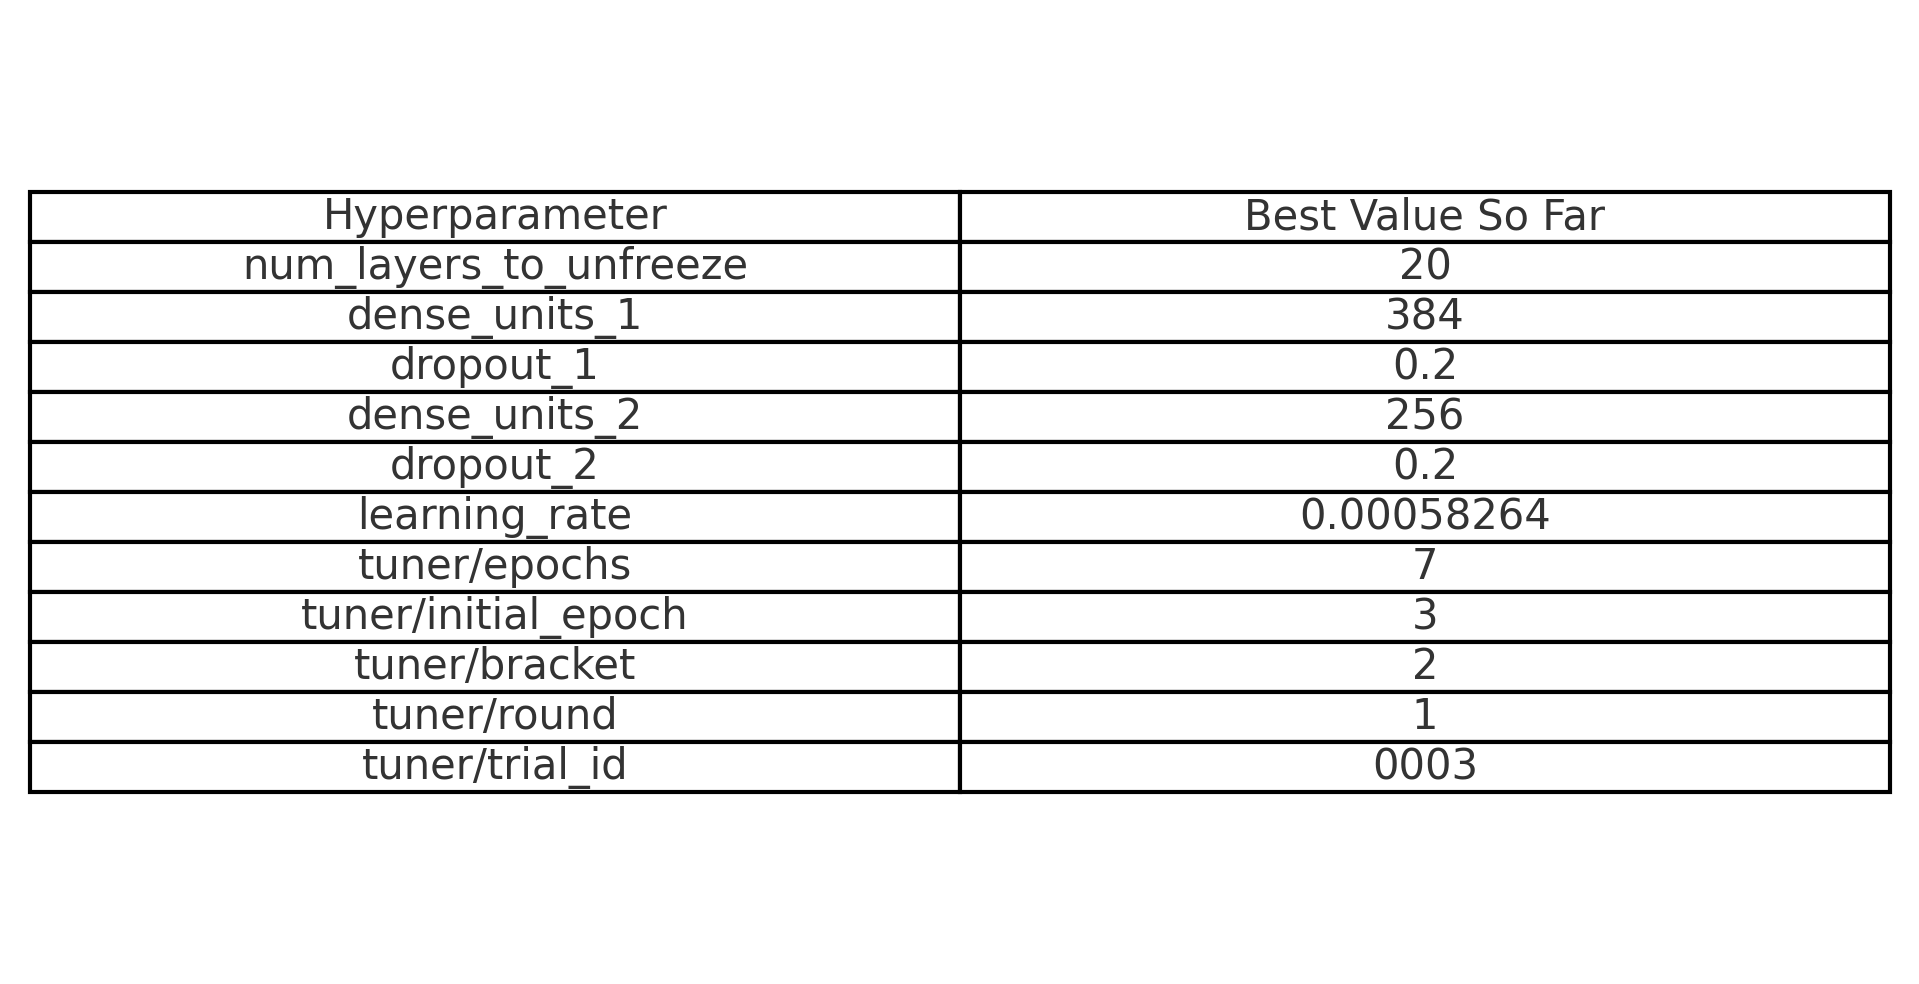

❌ **Qué No Sirve / Qué No Debe Repetirse**

Descongelar demasiadas capas: Hacerlo con más de 20 capas parece no mejorar mucho y solo alarga el tiempo de entrenamiento.

Dropout mayor a 0.3 no funcionó bien: Los trials con 0.4 o más en dropout no fueron los mejores.

Learning rate demasiado bajo (ej. 1e-5) ralentizó el aprendizaje sin mejorar loss.


# **Conclusión Modelado imágenes - "Mejor" modelo**

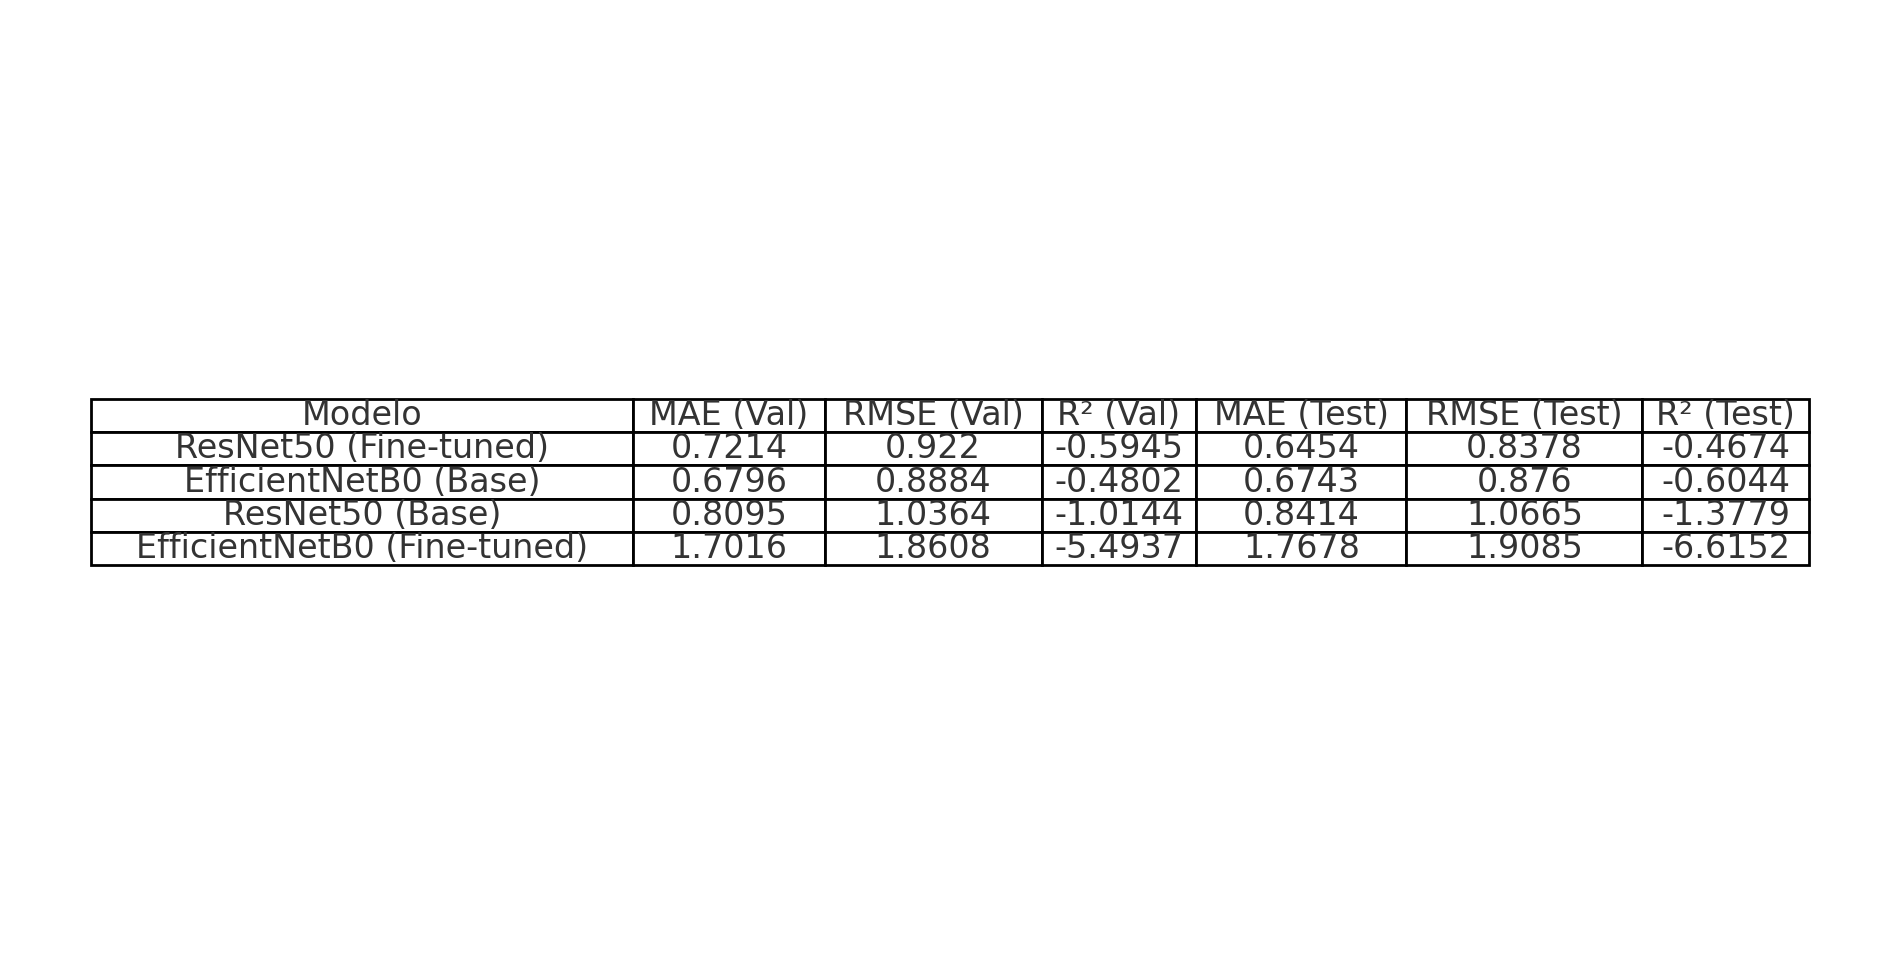

 ✅ ResNet50 Fine-tuned → Mejor Modelo (en comparación con las otras métricas):

Mejores métricas en validación y test.

MAE en test (0.6454) es el más bajo entre todos los modelos.

RMSE en test (0.8378) también es el mejor.

Mayor estabilidad en comparación con los otros modelos.

Aún no es perfecto, pero es el que generaliza mejor.

# 🔼**Con estas métricas podemos hacer fusion de modelos pues la data tabular puede complementar muy bien este modelo de imagenes y permitir una mejora en predicciones al tener mas datos. Las imágenes por si solas no estan capturando la complejidad del problema de predicción de precios.**
